### Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs

In [4]:
# Unpack our lat_lngs zip object into a list
coordinates = list(lat_lngs)

 -download citypy-

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

### Get the City Weather Data

Import Dependencies, and Initialize an Empty List and Counters

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | anapskaya
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | kimbe
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | manzhouli
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | road town
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | gamba
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | heinola
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | upernavik
Processing Reco

Processing Record 38 of Set 4 | la rioja
Processing Record 39 of Set 4 | almaznyy
Processing Record 40 of Set 4 | pangai
Processing Record 41 of Set 4 | christchurch
Processing Record 42 of Set 4 | gorontalo
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | mapiri
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | palana
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | luena
Processing Record 1 of Set 5 | zolotinka
City not found. Skipping...
Processing Record 2 of Set 5 | nemuro
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | pundaguitan
Processing Record 5 of Set 5 | komsomolskiy
Processing Record 6 of Set 5 | ardakan
Processing Record 7 of Set 5 | agadez
Processing Record 8 of Set 5 | souillac
Processing Record 9 of Set 5 | saint-pierre
Processing Record 10 of Set 5 | karpathos


Processing Record 29 of Set 8 | tucuman
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | bayana
Processing Record 32 of Set 8 | conde
Processing Record 33 of Set 8 | faanui
Processing Record 34 of Set 8 | kidal
Processing Record 35 of Set 8 | kyra
Processing Record 36 of Set 8 | cherskiy
Processing Record 37 of Set 8 | luganville
Processing Record 38 of Set 8 | amderma
City not found. Skipping...
Processing Record 39 of Set 8 | knesselare
Processing Record 40 of Set 8 | yanam
Processing Record 41 of Set 8 | lop buri
Processing Record 42 of Set 8 | sorong
Processing Record 43 of Set 8 | ruian
City not found. Skipping...
Processing Record 44 of Set 8 | elat
Processing Record 45 of Set 8 | suluq
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | kavieng
Processing Record 48 of Set 8 | pustoshka
Processing Record 49 of Set 8 | bosaso
Processing Record 50 of Set 8 | lensk
Processing Record 1 of Set 9 | avera
Processing Record 2 of Set 9 | anloga
Pr

Processing Record 18 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 19 of Set 12 | nador
Processing Record 20 of Set 12 | bushehr
Processing Record 21 of Set 12 | kelso
Processing Record 22 of Set 12 | charlestown
Processing Record 23 of Set 12 | holoby
Processing Record 24 of Set 12 | berea
Processing Record 25 of Set 12 | general pico
Processing Record 26 of Set 12 | union
Processing Record 27 of Set 12 | ambovombe
Processing Record 28 of Set 12 | kashi
Processing Record 29 of Set 12 | constitucion
Processing Record 30 of Set 12 | tumba
Processing Record 31 of Set 12 | saint-ambroise
Processing Record 32 of Set 12 | riverbank
Processing Record 33 of Set 12 | vredendal
Processing Record 34 of Set 12 | chokwe
Processing Record 35 of Set 12 | krasnogorskoye
Processing Record 36 of Set 12 | murgab
Processing Record 37 of Set 12 | ust-shonosha
Processing Record 38 of Set 12 | baiyin
Processing Record 39 of Set 12 | labuan
Processing Record 40 of Set 12 | gangapur
Pr

### Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.5011,-165.4064,-6.25,79,0,7.11,US,2022-01-29 01:59:56
1,Anapskaya,44.8900,37.3800,43.03,60,0,24.61,RU,2022-01-29 01:59:56


In [14]:
# Change the column order
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(2)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2022-01-29 01:59:56,64.5011,-165.4064,-6.25,79,0,7.11
1,Anapskaya,RU,2022-01-29 01:59:56,44.8900,37.3800,43.03,60,0,24.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

Creating a community outreach website for middle school STEM students.

##### Get Data

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

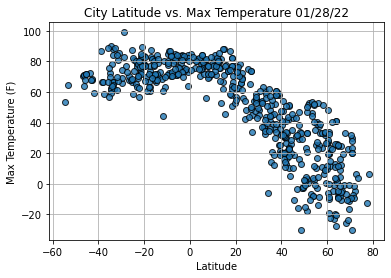

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_max_temp.png")

# Show plot.
plt.show()

### Plot Latitude vs. Humidity

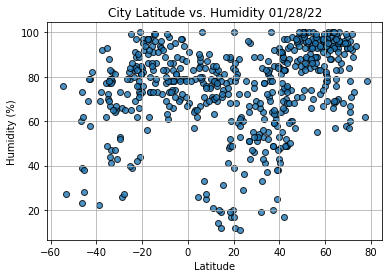

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/City_lat_vs_humidity.png")
# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

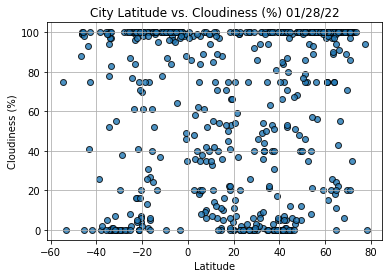

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/City_lat_vs_cloudiness.png")
# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

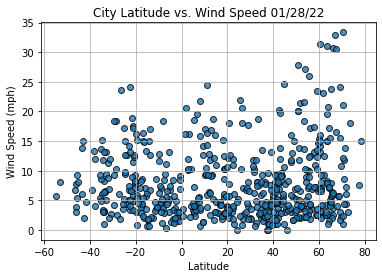

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/City_lat_vs_windspeed.png")
# Show plot.
plt.show()

### Create a Linear Regression Function

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

There will be no output until we call the function with five parameters.

In [ ]:
# By Index
index13 = city_data_df.loc[13]
#The output will present all the information at index 13 of the city_data_df DataFrame.

In [35]:
# By Params
# All Northern Hemisphere latitudes, for latitudes greater than or equal to 0:
Lat0 = city_data_df["Lat"] >= 0

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(2)
# return a DataFrame with all data fitting the criteria

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2022-01-29 01:59:56,64.5011,-165.4064,-6.25,79,0,7.11
1,Anapskaya,RU,2022-01-29 01:59:56,44.8900,37.3800,43.03,60,0,24.61


##### Assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Linear Regression - Max Temperature - Northern Hemisphere

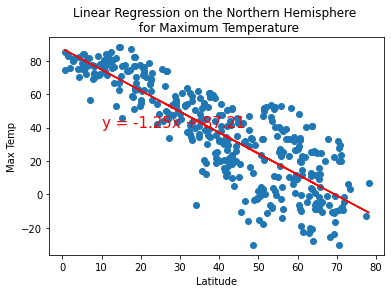

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

### Linear Regression - Max Temperature - Southern Hemisphere

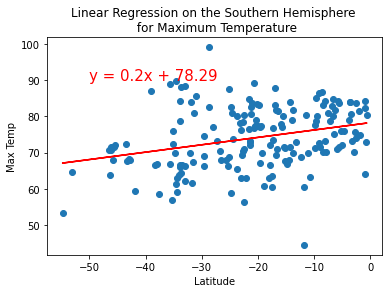

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

### Linear Regression - %Humidity - Northern Hemisphere

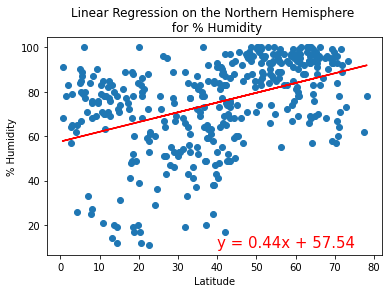

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


### Linear Regression - %Humidity - Southern Hemisphere

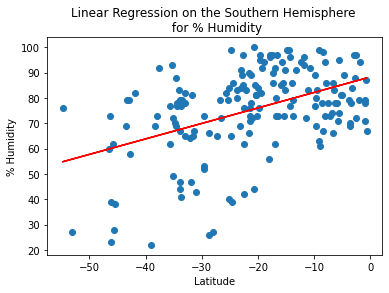

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(40,10))

### Linear Regression - %Cloudiness - Northern Hemisphere

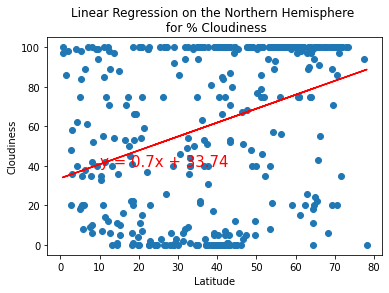

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(10,40))

### Linear Regression - %Cloudiness - Southern Hemisphere

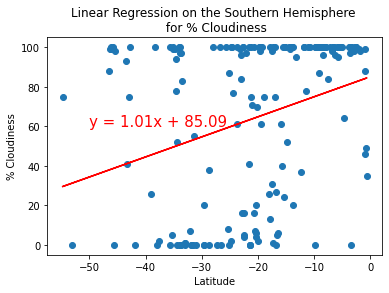

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


### Linear Regression - WindSpeed - Northern Hemisphere 

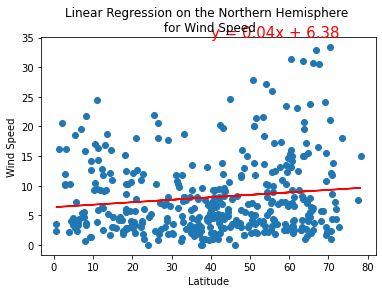

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

### Linear Regression - WindSpeed - Southern Hemisphere 

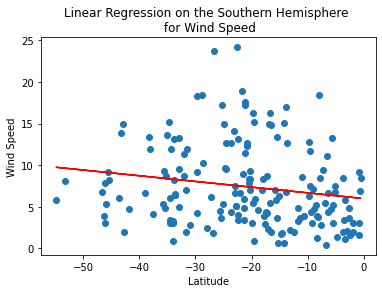

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))